In [63]:
#Import the library
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

In [64]:
# Declare the ...
IMAGE_BATCH = 32
IMAGE_SIZE = 256

In [65]:
#Make dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset-tomatoes",
    shuffle=True,
    batch_size=IMAGE_BATCH,
    image_size=(IMAGE_SIZE,IMAGE_SIZE)
)

Found 16011 files belonging to 10 classes.


In [66]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [67]:
#to know how long dataset every batc
len(dataset)

501

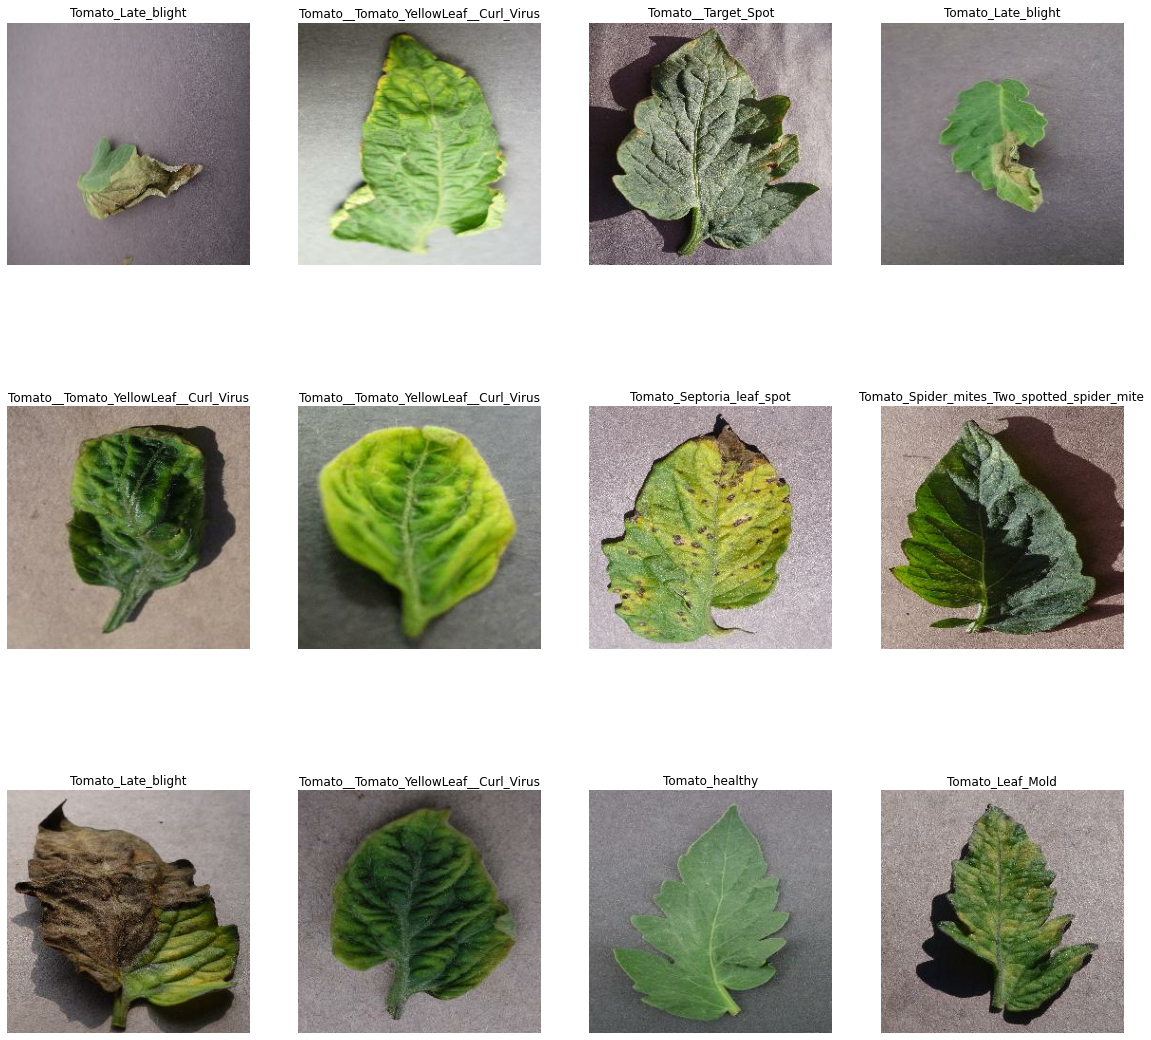

In [68]:
# showing the sample image
plt.figure(figsize=(20,20))
for image_batch, label_batch in dataset.take(1):# take in this meaning batch 1
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
#         print(image_batch)
#         print(image_batch.numpy())
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [69]:
# function for get 80% data of train, 10% data of validation, and 10% data of test.
def get_dataset_partition(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=17)
    
    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [70]:
# Input dataset to function
train_ds, val_ds, test_ds = get_dataset_partition(dataset)

In [71]:
# Make sure how many data partiton
print("Data Train we have      = "+str(len(train_ds)))
print("Data Validation we have = "+str(len(val_ds)))
print("Data Test we have       = "+str(len(test_ds)))

Data Train we have      = 400
Data Validation we have = 50
Data Test we have       = 51


In [72]:
#use chace and prefetch
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [73]:
#layer to rescaling and resize one image for all
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [74]:
#layer to flip in horizontal or vertical and rotate picture one image for all
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.25),
])